# <center>Title: Predition of Child's Birth Weight</center>
Shivani Dave and Pratik Warade

In [47]:
from sklearn import linear_model
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from math import sqrt
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

## Introduction:

 A new child's gender, name, time of birth, and birth weight are nice information for a birth announcement, but birth weight is especially important for an obstetrician.A large size at delivery has long been associated with an increased risk of injuries to a newborn and its mom. So the better a doctor can predict birth weight, the easier the delivery may be.The weight of the baby depends on various factors and can be calculated based on these. This problem can be solved using various machine learning algortihms and gives accurate results instead of relying on Ultrasound.
The data we have used is available on the National Center for Health Statistics. It has the various features like Gender of Baby, Mother's habits, Parents age etc and we will use all of them to make birth weight prediction. We can also determine the most relevant feature impacting the prediction. We have distinguished based on various features like:

* Difference in weight for drinker and non drinker parents
* Difference in weight of smokers and non smokers
* Difference on weight based on gender of child
* Difference in weight based on Parent's race
* Difference in weight based on late and early delivery
* APGAR score for the child

  We have used the below Machine Learning models for our predicitons:
  Least Square Regression
  Ridge Regression
  K Nearest Neighbors
  Decision Trees
  
  We have extracted the relevant features from the dataset and have shown their impact on the final prediction. We have divided divide the dataset into two parts i.e 80% for training data and 20% for testing data. Based on these algortihms we have  calculated Training and Testing Accuracy and will identify the best fit algorithm from the least Mean Absolute Error and RMSE values.


  We have checked various parameters with respect to each of the algorithms. In case of Ridge Regressions the features with high variance are be penalized. In KNN, we have observed variation in results based on k values.
  
  
  This data relates to avoiding complications during baby birth and will be quite helpful in the health industry. Also, it pertains to the actual health datasets available.Based on this dataset, we believe that these algorithms are the best fit and would give better predictions.

#### Data:
The <b>data</b> used is avaliable on the <b>National Vital Statistics System</b> which is a part of <b>National Center for Health Statistics</b>. It can be found on the below link:
<br>(https://nchs.beyond2020.com/vitalstats/ReportFolders/ReportFolders.aspx?IF_ActivePath=P%2C22%2C176)</br>
<br>Births data for the year <b>2008</b> has been used foe evalutaion and prediction.</br>

In [48]:
#Reading the data from the csv file.
child_data = pd.read_csv('2008_births.csv')
extracted_data = pd.DataFrame
train_data = pd.DataFrame
test_data = pd.DataFrame
evaluation_data = pd.DataFrame

## Methods:
The below block has all the definition of function and description about all of these:

In [49]:
# Extracting the necessary coulmns from the data
index = 0
#Function to convert to binary all the columns passes.
def convert_binary(x):
    global index
    if x == index:
        return 1
    else:
        return 0
#Function to convert hispanic from Y and N to 1 and 0
def convert_hisp_binary(x):
    if x == 'N':
        return 0
    else:
        return 1

In [50]:
#Transforming data as per the requirements. Irrelevant columns will be dropped
global index
global extracted_data 
#All the columns which contribute to the weight of the baby as per the National Center for Health Statistics:
columns_needed = ['SEX', 'MARITAL','FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'BPOUND', 'BOUNCE', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP',
                             'CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE']
extracted_data  = child_data.ix[:,columns_needed]

print ("Total number of initial rows:", len(extracted_data))

#Rows with no valid weights
extracted_data = extracted_data[extracted_data['BPOUND']!=99]
extracted_data = extracted_data[extracted_data['BOUNCE']!=99]
len(extracted_data)


weight_in_pound = extracted_data['BPOUND']#The data in pound 
weight_in_ounces = extracted_data['BOUNCE']#Data in ounces
#Calculating the total weight based on the above values. This will be the target vector
total_weight = weight_in_pound.astype(np.float) + (0.0625 * weight_in_ounces.astype(np.float))
extracted_data['WEIGHTLB'] = total_weight # New weight will be in column "WEIGHTLB"

'''There are total of 9 races that are taken into consideration which have been numbered from 0 to 9. They are'''
'''calculated separaely in different columns'''

raceColumns = ['OTHER_NON_WHITE', 'WHITE', 'BLACK', 'AMERICAN_INDIAN', 'CHINESE', 'JAPANESE', 'HAWAIIAN', 'FILIPINO', 'OTHER_ASIAN']

for race in raceColumns:
    extracted_data[race + '_MOM'] = extracted_data['RACEMOM'].map(convert_binary)#
    index = index + 1
index = 0
for race in raceColumns:
    extracted_data[race + '_DAD'] = extracted_data['RACEDAD'].map(convert_binary)
    index = index + 1
#Converting Hispanic Mom and Dad of Child to binary values
extracted_data['HISPMOM_BINARY'] = extracted_data['HISPMOM'].map(convert_hisp_binary)
extracted_data['HISPDAD_BINARY'] = extracted_data['HISPDAD'].map(convert_hisp_binary)

not_required = ['BPOUND','BOUNCE','RACEMOM','RACEDAD','HISPMOM','HISPDAD']
#Dropping the columns which are of no use
for column in not_required:
    extracted_data = extracted_data.drop(column, 1)
    

no_relevant_data = ['MAGE','FEDUC','MEDUC','TOTALP','BDEAD','TERMS','WEEKS','CIGNUM','DRINKNUM','GAINED', 'VISITS']


no_relevant_data9 = ['ANEMIA','CARDIAC','ACLUNG','DIABETES','HERPES','HYDRAM','HEMOGLOB','HYPERCH','HYPERPR','ECLAMP'
                   ,'CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE','MARITAL']

no_val_data = extracted_data[extracted_data['FAGE']!=99]

for col in no_relevant_data:
    no_val_data = no_val_data[no_val_data[col]!=99]
    
for col in no_relevant_data9:
    no_val_data = no_val_data[no_val_data[col]!=9]
    
no_data_val_98 = ['CIGNUM','DRINKNUM']
for col in no_data_val_98:
    no_val_data = no_val_data[no_val_data[col]!=98]
    
last_outcome = no_val_data['LOUTCOME'][no_val_data['LOUTCOME'] == 9.0]
last_outcome[no_val_data['TOTALP'] == 1.0] = 1.0
    
print ("Number of rows after all the filtering are:",len(no_val_data))
print ("Number of features present are:", len(no_val_data.columns))

Total number of initial rows: 133422
Number of rows after all the filtering are: 131324
Number of features present are: 52


In [51]:
extracted_data.columns

Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'WEIGHTLB', 'OTHER_NON_WHITE_MOM', 'WHITE_MOM', 'BLACK_MOM', 'AMERICAN_INDIAN_MOM', 'CHINESE_MOM', 'JAPANESE_MOM', 'HAWAIIAN_MOM', 'FILIPINO_MOM', 'OTHER_ASIAN_MOM', 'OTHER_NON_WHITE_DAD', 'WHITE_DAD', 'BLACK_DAD', 'AMERICAN_INDIAN_DAD', 'CHINESE_DAD', 'JAPANESE_DAD', 'HAWAIIAN_DAD', 'FILIPINO_DAD', 'OTHER_ASIAN_DAD', 'HISPMOM_BINARY', 'HISPDAD_BINARY'], dtype='object')

##### The data is being split into training and test Data.
80% data is training and 20% data is testing data. This data is split randomly.

In [52]:
def split_main_data():
        global no_val_data
        global train_data 
        global test_data
        global evaluation_data
        Temporary_data = pd.DataFrame
        rand_split = np.random.rand(len(no_val_data)) < 0.80
        train_data = no_val_data[rand_split]
        test_data = no_val_data[~rand_split]
        print('Train(len) : {0} rows'.format(str(len(train_data))))
        print ('Test(len) : {0} rows'.format(str(len(test_data))))
        

split_main_data()

Train(len) : 105142 rows
Test(len) : 26182 rows


In [53]:
train_total_weight = train_data['WEIGHTLB']
test_total_weight = test_data['WEIGHTLB']

#Dropping the target column which corresponds to weight of the baby!
train_data = train_data.drop(['WEIGHTLB'], 1)
test_data = test_data.drop(['WEIGHTLB'], 1)

### Calculating the child's weight(Anita's child) as per user mentioned parameters:
- Gender of Baby: Male
- Father’s Age: 32
- Mother’s Age: 28
- Gestation period: 43 Weeks
- Weight Gained: 20 lbs.
- Parity of Mother: 1
- Drinks per week: 0.5
- Anaemic: True
- Ethnicity of Father: WHITE
- Ethnicity of Mother: WHITE
- Marital Status: True
- Education of Father: 26 years
- Education of Mother: 22 years
- Pre Natal Care: True
- Number of Prenatal Visits: 13

In [54]:
#The below row is for predicting the value of weight for any mother with the features mentioned
Anita_details = [1, 1, 28, 20, 13, 32, 22, 26, 1, 0, 0, 1, 42, 0, 0.5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
last = test_data .index[len(test_data.index) - 1]
test_data .loc[last + 1] = Anita_details

In [55]:
test_data.columns

Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'OTHER_NON_WHITE_MOM', 'WHITE_MOM', 'BLACK_MOM', 'AMERICAN_INDIAN_MOM', 'CHINESE_MOM', 'JAPANESE_MOM', 'HAWAIIAN_MOM', 'FILIPINO_MOM', 'OTHER_ASIAN_MOM', 'OTHER_NON_WHITE_DAD', 'WHITE_DAD', 'BLACK_DAD', 'AMERICAN_INDIAN_DAD', 'CHINESE_DAD', 'JAPANESE_DAD', 'HAWAIIAN_DAD', 'FILIPINO_DAD', 'OTHER_ASIAN_DAD', 'HISPMOM_BINARY', 'HISPDAD_BINARY'], dtype='object')

Normalize the required columns to bring them to same scale as others so that the associated weights are given same consideration.

In [56]:
#z-score is used for normalization
def normalizeData_zscore(df, nonStandardColumns):
   for col in nonStandardColumns:
       xx = df[col]
       mean_xx = np.mean(df[col])
       std_xx = np.std(df[col])
       df[col+'_NEW'] = (df[col]-mean_xx)/std_xx
       df.drop(axis=1,labels=[col], inplace=True)

In [57]:
cols1 = ['FAGE','MAGE','FEDUC','VISITS','MEDUC','TOTALP','BDEAD','TERMS','WEEKS','CIGNUM','DRINKNUM','GAINED']
normalizeData_zscore(train_data,cols1)
normalizeData_zscore(test_data,cols1)

###### Comparison of the features associated with the data. 
In this section we will study the effects of feature on target i.e birth weight

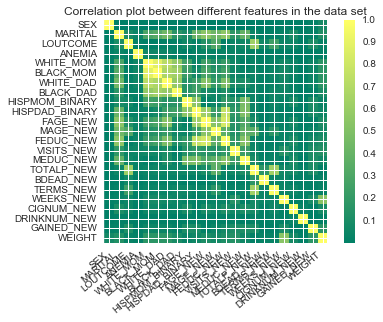

In [58]:
columns_needed = [u'SEX', u'MARITAL', u'LOUTCOME', u'ANEMIA', u'WHITE_MOM', u'BLACK_MOM', u'WHITE_DAD',
                  u'BLACK_DAD', u'HISPMOM_BINARY', u'HISPDAD_BINARY', u'FAGE_NEW', u'MAGE_NEW', u'FEDUC_NEW',
                  u'VISITS_NEW', u'MEDUC_NEW', u'TOTALP_NEW', u'BDEAD_NEW', u'TERMS_NEW', u'WEEKS_NEW',
                  u'CIGNUM_NEW', u'DRINKNUM_NEW', u'GAINED_NEW']
corr_train_data = train_data.ix[:,columns_needed]
corr_train_data['WEIGHT'] = train_total_weight
corr = corr_train_data.corr()
#replace all -ve values with +ve values
corr=corr.where(corr>0, corr * -1)
plt.imshow(corr, cmap='summer', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
locs, labels = plt.xticks()
plt.setp(labels, rotation=40, ha='right')
ticks = plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation plot between different features in the data set')
plt.show()

It seems that most of the features will have a positive effect on the target feature. These are all feature that seems most strongly correlated to the target feature with value ranging from 1.0 to 0.1.


### Feature: Comparison between  Delivery period

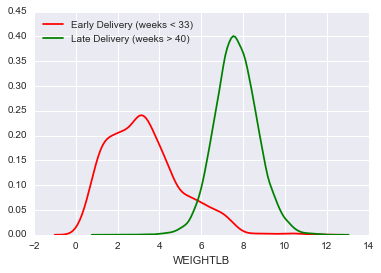

In [59]:
early_del = no_val_data['WEIGHTLB'][no_val_data['WEEKS']<33.0]
late_del = no_val_data['WEIGHTLB'][no_val_data['WEEKS']>40.0]
sns.distplot(early_del, bins= 15, color = 'red', hist=False, label= 'Early Delivery (weeks < 33)')
sns.distplot(late_del, bins = 15, color = 'green', hist=False, label= 'Late Delivery (weeks > 40)')

The graph above shows the weight differnce when the delivery is early  and late. It make sense as premature birth gives the baby less time to develop in the womb. Premature babies, especially those born earliest, often have complicated medical problems.

### Comparison between all the APGAR scores and the weights

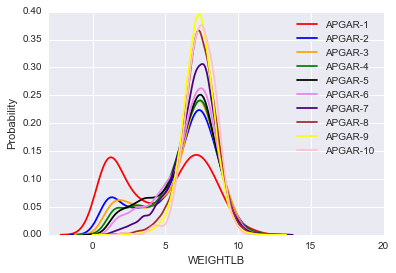

In [60]:
child_data = child_data[child_data['APGAR1']!=99]
pound_child = child_data['BPOUND']
ounces_child = child_data['BOUNCE']
weight_child= pound_child.astype(np.float) + (0.0625 * ounces_child.astype(np.float))
child_data['WEIGHTLB'] = weight_child

printing= child_data['WEIGHTLB'][child_data['APGAR1']== 1]
len(child_data)

colors = ['red', 'blue', 'orange', 'green', 'black', 'violet', 'indigo', 'brown','yellow','pink']
for i in range(1,11):
    printing = child_data['WEIGHTLB'][child_data['APGAR1']== i]
    sns.distplot(printing, bins = 15, color = colors[i-1], hist=False, label= 'APGAR-'+str(i))
plt.xlim((-3,20))
plt.ylabel('Probability')

APGAR scores range from one to two for each condition with a maximum final total score of ten. At the one minute APGAR, scores between seven and ten indicate that the baby will need only routine post delivery care.  Scores between four and six indicate that some assistance for breathing might be required. Scores under four can call for prompt, lifesaving measures.

At the five minute APGAR, a score of seven to ten is normal. If the score falls below seven, the baby will continue to be monitored and retested every five minutes for up to twenty minutes. Lower than normal scores do not mean that there will be permanent health problems with the child.

### Feature : APGAR Score

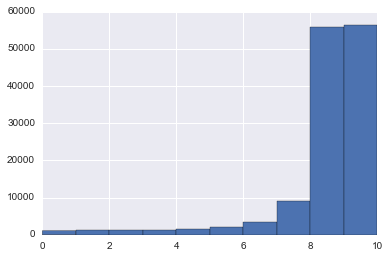

In [61]:
child_data  = child_data [child_data ['APGAR1']!=99]
plotting = child_data ['APGAR1']
plotting.hist()

Most of the child's falls in range 8-10 . A score of 8-10 means that  baby is in good health overall and there are no issues or concerns that need to be addressed. During your stay in the hospital and at your following check-ups, your baby will continue to be checked to make sure that that good health continues.

### Feature: Gender

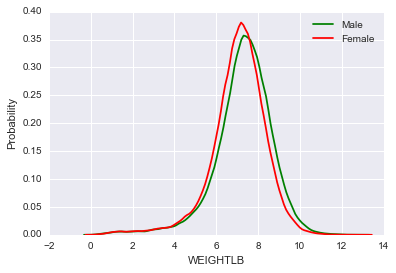

In [62]:
male = no_val_data['WEIGHTLB'][no_val_data['SEX']== 1.0]
sns.distplot(male, bins= 15, color = 'green', hist=False, label= 'Male')
#cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'].isin(frange(1.0,99.0,1.0))]
female = no_val_data['WEIGHTLB'][no_val_data['SEX'] == 2.0]
sns.distplot(female, bins = 15, color = 'red', hist=False, label= 'Female')
plt.ylabel('Probability')
plt.show()

These graph shows an interesting observation that the female child average weight is more as compare to the male born. According to the American Academy of Pediatrics, Newborn baby boys tend to be heavier than their female counterparts. However, the differences are slight. On average, boys weigh less than a pound more than girls. 

### Feature: Smoking

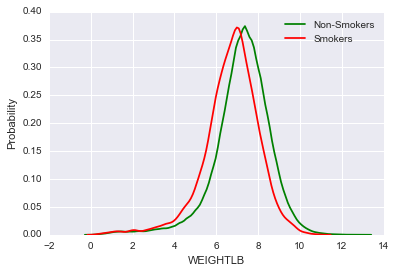

In [63]:
no_cignum = no_val_data['WEIGHTLB'][no_val_data['CIGNUM']==0.0]
sns.distplot(no_cignum, bins= 15, color = 'green', hist=False, label= 'Non-Smokers')

cignum = no_val_data['WEIGHTLB'][no_val_data['CIGNUM'] != 0.0]
sns.distplot(cignum, bins = 15, color = 'red', hist=False, label= 'Smokers')
plt.ylabel('Probability')
plt.show()

The graph above comapares the difference of child weight based on mother activity i.e Smoking. Its clearly show that smoker child weight is slightly  less than  Non-smoker. As, while smoking there is  shortage of oxygen and that can have devastating effects on your baby's growth and development.

### Feature: Drinking

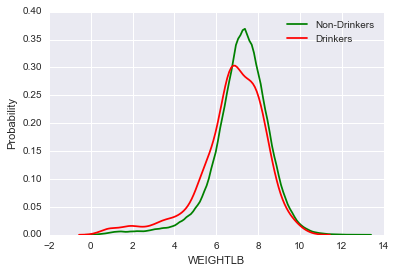

In [64]:
no_Drinking = no_val_data['WEIGHTLB'][no_val_data['DRINKNUM']==0.0]
sns.distplot(no_Drinking, bins= 15, color = 'green', hist=False, label= 'Non-Drinkers')

Drinking = no_val_data['WEIGHTLB'][no_val_data['DRINKNUM'] != 0.0]
sns.distplot(Drinking, bins = 15, color = 'red', hist=False, label= 'Drinkers')
plt.ylabel('Probability')
plt.show()

The above graph shows that weight differnce between  Non-drinker and drinker habit of mother. As ,the alcohol not only gets into blood but it also goes to your baby through the placenta.  In the baby's immature body, alcohol is broken down much more slowly than in your body. While the alcohol may affect you only temporarily, it can slow down your baby's growth, cause facial and other physical defects, affect the baby's brain and the baby's general development and cause life-long birth defects.

### Feature : Race

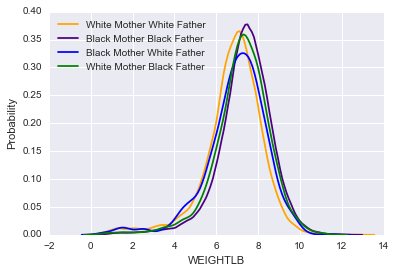

In [65]:
black_mom = no_val_data['WEIGHTLB'][no_val_data['BLACK_MOM']==1.0]
black_md = black_mom[no_val_data['BLACK_DAD']==1.0]
blackwhite = black_mom[no_val_data['WHITE_DAD']==1.0]

white_mom = no_val_data['WEIGHTLB'][no_val_data['WHITE_MOM']==1.0]
whitemom_dad = white_mom[no_val_data['WHITE_DAD']==1.0]
whitemom_black_dad = white_mom[no_val_data['BLACK_DAD']==1.0]


sns.distplot(black_md, bins= 15, color = 'orange', hist=False, label= 'White Mother White Father')
sns.distplot(whitemom_dad, bins = 15, color = 'indigo', hist=False, label= 'Black Mother Black Father')
sns.distplot(blackwhite, bins = 15, color = 'blue', hist=False, label= 'Black Mother White Father')
sns.distplot(whitemom_black_dad, bins = 15, color = 'green', hist=False, label= 'White Mother Black Father')

plt.ylabel('Probability')
plt.show()

The above graph show the average weight of child depending of diferent race of parents.

<center><h2> Models and evaluation of framework</h2></center>

These are the based model that we compare the error rate of actual model :
- Root Mean Square Error
- R2 score
- Mean Absolute Error


Following are the machine learning models used:
- Ordinary Least Squares Regression
- Ridge Regression
- K Nearest Neighbors
- Decision Trees
- Random Forest Regression

Bellow function allows to use ranges, just as the built-in function range(), but with float arguments. 

In [66]:
def float_range_increment(num_start, num_end=None, num_inc=None):
    "A range function, that does accept float increments..."
    temp = []

    if num_inc == None:
        num_inc = 1.0
        
        
    if num_end == None:
        num_end = num_start + 0.0
        num_start = 0.0

 
    while 1:
        next = num_start + len(temp) * num_inc
        if num_inc > 0 and next >= num_end:
            break
        elif num_inc < 0 and next <= num_end:
            break
        temp.append(next)
        
    return temp

In [67]:
dictionary = {} 

distributionoferror Function is learning model that we compare it with the actual model we are evaluating. It also  output the RMSE, Mean absolute error , R2 score and explained variance score with the error distribution plot




In [68]:
def distributionoferror(test_data, actualWeight, predictedweight, modelName, plotIndex):    
   plt.xticks(float_range_increment(-7,7,1))
   values = {}
   position_1 = [0,0.45]
   position_2 = [1,0.4]
   position_3 = [-1,0.4]
   test_data['WT_DIFF'] = (actualWeight - predictedweight)
   axis = sns.distplot(test_data['WT_DIFF'], bins=50, label='Error in Weight')
   meanError = np.mean(test_data['WT_DIFF'])
   stdError = np.std(test_data['WT_DIFF'])
   string_line1 = 'Mean'
   string_line2 = 'Std Dev'
   axis.set_xlim((-7,7))   
   axis.set_title('Probablity Distribution of Error :- ' + modelName)
   axis1 = axis.plot([meanError,meanError],[0,1])
   axis.text(position_1[0], position_1[1], string_line1, size=10, color = 'g', ha="center", va="center")
   axis2 = axis.plot([stdError,stdError],[0,1], color='b')
   axis.text(position_2[0], position_2[1], string_line2, size=10, color = 'g', ha="center", va="center")
   axis3 = axis.plot([-stdError,-stdError],[0,1], color='b')
   axis.text(position_3[0], position_3[1], string_line2, size=10, color = 'g', ha="center", va="center")
   axis.set_xlabel('Error of Weight')
   axis.set_ylabel('Prob.')
   rms = sqrt(mean_squared_error(actualWeight, predictedweight))
   print ('The RMSE for', modelName, 'is', rms)
   values['RMS'] = rms
   r2score = r2_score(actualWeight, predictedweight)
   print ('The r2 score for', modelName, 'is', r2score)
   values['R2 Score'] = r2score
   evs = explained_variance_score(actualWeight, predictedweight)
   mae = mean_absolute_error(actualWeight,predictedweight)
   print ('Mean absolute error of', modelName, 'is', mae)
   values['Mean Absolute Error'] = mae  
   print ('\n')  
   dictionary[modelName] = values

### Baseline Model

Our baseline model uses  the average of all the birth weights in the data set. 

### Evaluation

The RMSE for Baseline Model is 1.358900326499864
The r2 score for Baseline Model is 0.0
Mean absolute error of Baseline Model is 0.99475475407




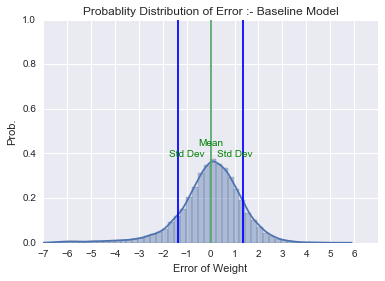

In [69]:
test_dataCopy = test_data.iloc[:-1]
test_dataCopy['BASELINE_WEIGHT'] = np.mean(test_total_weight)
test_dataCopy['ACTUAL_WEIGHT'] = test_total_weight
distributionoferror(test_dataCopy, test_dataCopy['ACTUAL_WEIGHT'], test_dataCopy['BASELINE_WEIGHT'], 'Baseline Model', 1)


### Prediction on Anita's Child

In [70]:
print ("Prediction for Anita's child based on Baseline Model is", np.mean(test_total_weight))

Prediction for Anita's child based on Baseline Model is 7.188717439462226


### Ordinary Least Squares Regression Model

In [71]:
datatoList = []
for idx,row in train_data.iterrows():
    datacurrentList = row.values.tolist()
    datatoList.append(datacurrentList)

Training the data using the OLS model.

In [72]:
clf = linear_model.LinearRegression()
clf.fit(datatoList, train_total_weight)
coeffArray = clf.coef_
intercept = clf.intercept_ 

In [73]:
print ("The co-efficients and the intercept as per OLS:")
print ("___________________Co-efficients_________________________")
print (coeffArray)
print ("___________________Intercepts____________________________")
print (intercept)

The co-efficients and the intercept as per OLS:
___________________Co-efficients_________________________
[ -2.53693229e-01  -8.78741846e-02  -1.81512122e-02   1.57614956e-02
  -2.29568031e-02  -2.14509255e-02   3.24322680e-01   3.07813101e-02
  -3.43970486e-01   7.44568650e-02  -2.38026384e-01  -3.71796571e-01
  -6.82003741e-01  -5.32859629e-01   9.50099967e-01  -5.44030141e-01
  -1.14438851e-01   6.34940909e-03  -4.06582134e-01  -3.18624370e+11
  -3.18624370e+11  -3.18624370e+11  -3.18624370e+11  -3.18624370e+11
  -3.18624370e+11  -3.18624370e+11  -3.18624370e+11  -3.18624370e+11
   1.45347746e-02   4.81486278e-02  -1.23944120e-02  -2.73278173e-03
  -2.24192679e-01  -1.00085165e-01  -7.26380099e-02  -3.83129502e-01
  -2.44703787e-01   5.10504463e-02  -4.42954057e-02   8.61884567e-03
   4.34264279e-02  -1.27373557e-02   4.71263590e-02   2.33741624e-02
   6.61042743e-02  -1.80595984e-02  -6.24757397e-02   6.97036456e-01
  -1.13311877e-01   6.09791794e-04   1.63202727e-01]
_____________

### Testing the OLS Model 

In [74]:
olsPrediction = clf.predict(test_data)

In [75]:

test_dataCopy = test_data.iloc[:-1]
test_dataCopy['ACTUAL_WEIGHT'] = test_total_weight

### Evaluation

The RMSE for OLS Regression is 1.0575436339829158
The r2 score for OLS Regression is 0.394350469882
Mean absolute error of OLS Regression is 0.814934846288




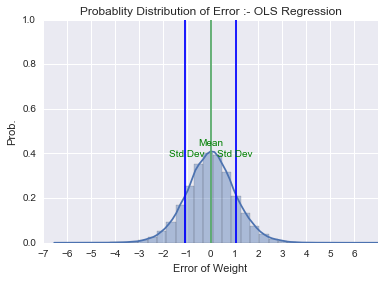

In [76]:
test_dataCopy['PREDICTED_WEIGHT_OLS'] = olsPrediction[:-1]
distributionoferror(test_dataCopy, test_dataCopy['ACTUAL_WEIGHT'], test_dataCopy['PREDICTED_WEIGHT_OLS'], 'OLS Regression', 2)


### Prediction on Anita's child

The prediction of OLS Regression Model on Sammi is obtained by taking dot-product of the co-efficients obtained from the model with corresponding sammy's data.

In [78]:
print ("Prediction forAnita's child as per OLS Regression is", olsPrediction[-1])

Prediction forAnita's child as per OLS Regression is 8.42578125


### Ridge Regression Model

<img src="http://businessforecastblog.com/wp-content/uploads/2014/05/ridgeregressionOF.png">

In [79]:
clf = linear_model.Ridge(alpha = 0.5)
clf.fit(datatoList, train_total_weight)
coeffArray = clf.coef_
intercept = clf.intercept_

In [80]:
print ("The co-efficients and the intercept determined by the Ridge Regression are:")
print ("___________________Co-efficients_________________________")
print (coeffArray)
print ("___________________Intercepts____________________________")
print (intercept)

The co-efficients and the intercept determined by the Ridge Regression are:
___________________Co-efficients_________________________
[ -2.53711480e-01  -8.85409472e-02  -1.81455763e-02   1.57636558e-02
  -2.35229223e-02  -2.20727488e-02   3.24566525e-01   3.03155449e-02
  -3.43973910e-01   7.27415981e-02  -2.38266464e-01  -3.71915759e-01
  -6.81461531e-01  -5.32811325e-01   9.48797388e-01  -5.43389413e-01
  -1.13053130e-01   4.76764038e-03  -4.05641283e-01   1.13094783e-02
   8.40822893e-02  -2.05214686e-01  -7.61133610e-03   1.28539406e-01
  -1.81677067e-01   3.27716747e-01  -7.02908520e-02  -8.68539795e-02
   1.44366352e-02   4.84980017e-02  -1.21237019e-02  -2.60942844e-03
  -2.18989004e-01  -9.92995794e-02  -7.00526150e-02  -3.80290945e-01
  -2.44090170e-01   5.10964145e-02  -4.43509123e-02   8.47468630e-03
   4.34785590e-02  -1.27420588e-02   4.71373511e-02   2.33617304e-02
   6.60584984e-02  -1.80336020e-02  -6.24843611e-02   6.97050315e-01
  -1.13278559e-01   5.89826761e-04   1

In [81]:
ridgePrediction = clf.predict(test_data)

### Evaluation

The RMSE for Ridge Regression is 1.0575418296046253
The r2 score for Ridge Regression is 0.394352536596
Mean absolute error of Ridge Regression is 0.814940904007




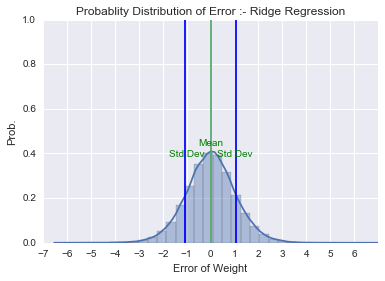

In [82]:
test_dataCopy['PREDICTED_WEIGHT_RIDGE'] = ridgePrediction[:-1]
distributionoferror(test_dataCopy, test_dataCopy['ACTUAL_WEIGHT'], test_dataCopy['PREDICTED_WEIGHT_RIDGE'], 'Ridge Regression', 3)


### Prediction on Anita's child

In [84]:
print ("Prediction for Anita's child according to Ridge Regression is", ridgePrediction[-1])

Prediction for Anita's child according to Ridge Regression is 8.4260048667


### K-nearest neighbors

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

Both for classification and regression, it can be useful to assign weight to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones.

<img src="http://image.slidesharecdn.com/aipresentation-140327165146-phpapp02/95/a-novel-approach-for-breast-cancer-detection-using-data-mining-tool-weka-55-638.jpg?cb=1395939659">

In [85]:
y1=train_total_weight
train_total_weight=np.asarray(train_total_weight,dtype="|S6")
X_data, y_data = train_data, train_total_weight

print(X_data.shape)
print(y_data[0])
n_neighbors=11
knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_data, y_data)
knnPrediction = knn.predict(test_data)

(105142, 51)
b'8.1875'


In [86]:
knnPrediction=np.asarray(knnPrediction,dtype=float)
print(knnPrediction)

[ 2.9375  6.5     6.625  ...,  5.8125  6.625   6.875 ]


### Evaluation

The RMSE for KNN Regression is 1.5978321223804535
The r2 score for KNN Regression is -0.382569874907
Mean absolute error of KNN Regression is 1.24571805057




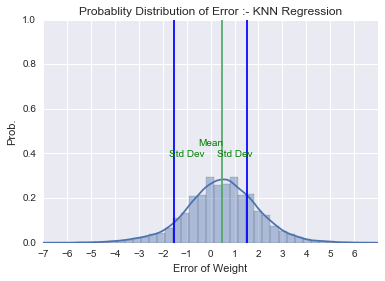

In [87]:
test_dataCopy['K_NEAREST_NEIGHBOURS'] = knnPrediction[:-1]
distributionoferror(test_dataCopy, test_dataCopy['ACTUAL_WEIGHT'], test_dataCopy['K_NEAREST_NEIGHBOURS'], 'KNN Regression', 4)
plt.show()

### Prediction on Anita's child

In [89]:
print ("Prediction for Anita's child as per k Nearest Neighbor Model is", knnPrediction[-1])

Prediction for Anita's child as per k Nearest Neighbor Model is 6.875


### Decision Tree Regression

Decision tree learning uses a decision tree as a predictive model which maps observations about an item to conclusions about the item's target value. It is one of the predictive modelling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a finite set of values are called classification trees. In these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

<img src="http://image.slidesharecdn.com/decisiontreesoftmaxregressionandensemblemethodsinmachinelearning-141019174424-conversion-gate01/95/decision-tree-softmax-regression-and-ensemble-methods-in-machine-learning-7-638.jpg?cb=1413740738">



In [90]:
resultsDict = {}
final_prediction = []
minrms = 2.0


for val_of_depth in range(1,15):
    
    temp = DecisionTreeRegressor(max_depth=val_of_depth)
    temp.fit(train_data, train_total_weight)

    # Predict
    predict_tree = temp.predict(test_data)
    data_name_col = str(val_of_depth) + '_DEC_TREE'

    test_dataCopy[data_name_col] = predict_tree[:-1]
    test_dataCopy['ERROR_'+data_name_col] = test_dataCopy['ACTUAL_WEIGHT']  - test_dataCopy[data_name_col]   

    test_dataCopy['ERROR_'+data_name_col+'_SQUARED'] = (test_dataCopy['ERROR_'+data_name_col] * test_dataCopy['ERROR_'+data_name_col])
    rms_val = sqrt(np.mean(test_dataCopy['ERROR_'+data_name_col+'_SQUARED']))
    #compare  RMS
    if rms_val < minrms:
        minrms = rms_val
        final_prediction = predict_tree
    print ("RMS of", val_of_depth, "for model is", rms_val)
    resultsDict[val_of_depth] = rms_val

RMS of 1 for model is 1.1769814513430974
RMS of 2 for model is 1.0863539407120741
RMS of 3 for model is 1.0633145212209452
RMS of 4 for model is 1.0469041923516875
RMS of 5 for model is 1.0362310717616567
RMS of 6 for model is 1.0273434355356232
RMS of 7 for model is 1.0202823606936087
RMS of 8 for model is 1.0175768428536092
RMS of 9 for model is 1.0158827482972195
RMS of 10 for model is 1.0203126733317425
RMS of 11 for model is 1.0273383348369756
RMS of 12 for model is 1.0405751267990162
RMS of 13 for model is 1.0522557442308034
RMS of 14 for model is 1.0714055751665494


Plotting the graph the depth of decision tree.

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[1.1769814513430974, 1.0863539407120741, 1.0633145212209452, 1.0469041923516875, 1.0362310717616567, 1.0273434355356232, 1.0202823606936087, 1.0175768428536092, 1.0158827482972195, 1.0203126733317425, 1.0273383348369756, 1.0405751267990162, 1.0522557442308034, 1.0714055751665494]
{1: 1.1769814513430974, 2: 1.0863539407120741, 3: 1.0633145212209452, 4: 1.0469041923516875, 5: 1.0362310717616567, 6: 1.0273434355356232, 7: 1.0202823606936087, 8: 1.0175768428536092, 9: 1.0158827482972195, 10: 1.0203126733317425, 11: 1.0273383348369756, 12: 1.0405751267990162, 13: 1.0522557442308034, 14: 1.0714055751665494}
<class 'numpy.ndarray'>


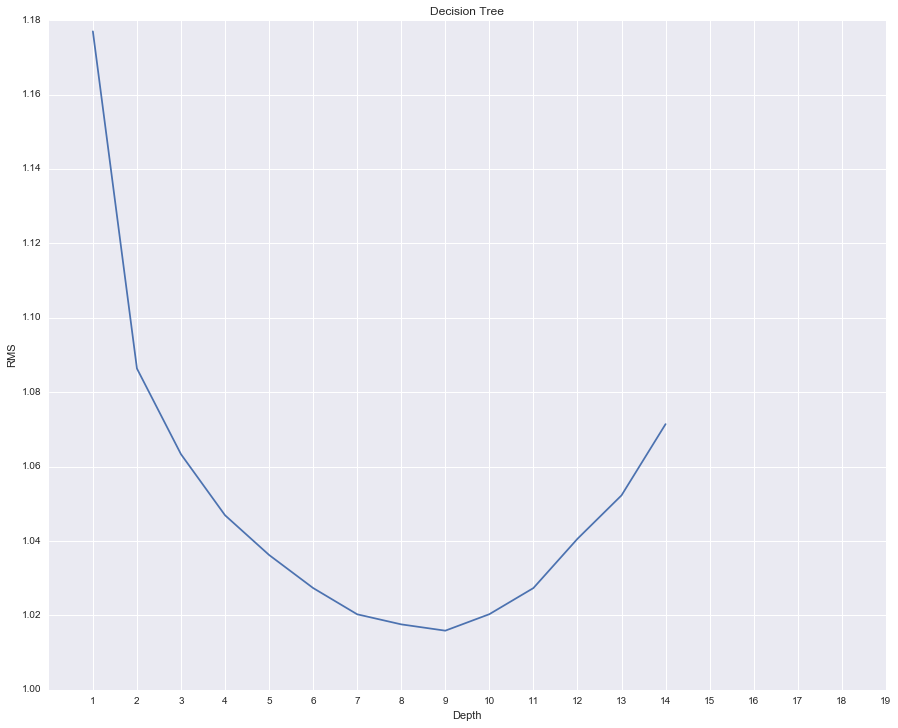

In [91]:
fig, axes = plt.subplots(figsize=(15,12))


print(resultsDict.keys())
check2=[]
check3=[]
for i in resultsDict.keys():
    check2.append(i)
print(check2)
for i in resultsDict.values():
    check3.append(i)
print(check3)
axes.plot(check2, check3)
print (resultsDict)
plt.xlabel("Depth")
plt.xticks(range(1,20))
plt.ylabel("RMS")
#axes.bar(preDict.keys(), preDict.values(), align="center", width=0.5, alpha=0.5)
axes.set_title("Decision Tree")
print (type(final_prediction))

The above plot shows the variation of error with depth for the decision tree regression model. It can be observed that depth = 9 produces the least RMSE value.

### Evaluation

The RMSE for Decision Tree Regression is 1.0158827482972193
The r2 score for Decision Tree Regression is 0.441128498234
Mean absolute error of Decision Tree Regression is 0.786569503038




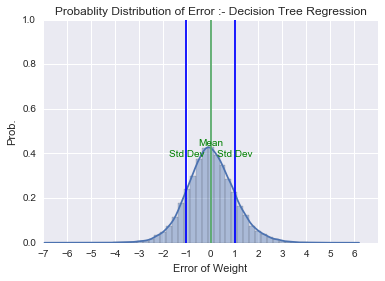

In [92]:
distributionoferror(test_dataCopy, test_dataCopy['ACTUAL_WEIGHT'], final_prediction[:-1], 'Decision Tree Regression', 1)
#plt.show()

### Prediction on Anita's child

In [94]:
print ("Prediction for Anita's child as per Decision Trees is", final_prediction[-1])

Prediction for Anita's child as per Decision Trees is 7.96261920818


## Results

#### Error Distribution of models

In [95]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 2000)
newDF= pd.DataFrame(dictionary)
newDF

,Baseline Model,Decision Tree Regression,KNN Regression,OLS Regression,Ridge Regression
Mean Absolute Error,0.994755,0.786570,1.245718,0.814935,0.814941
R2 Score,0.000000,0.441128,-0.382570,0.394350,0.394353
RMS,1.358900,1.015883,1.597832,1.057544,1.057542


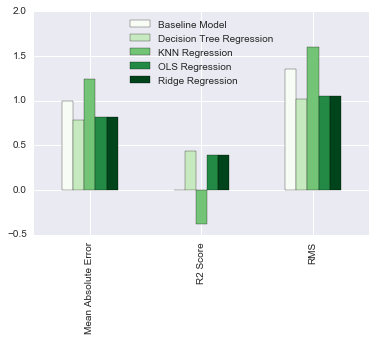

In [96]:
newDF
plt.figure(figsize=(10,10))
newDF.plot(kind='bar', colormap='Greens')

##### Distribution of work:
We have worked by dividing the tasks as below:
1. Data filtering and  spliting the dataset - Shivani and Pratik
2. Initial analysis of the data - Shivani and Pratik
3. Implementation of Algorithms and calculation of error(RMSE and Mean Absoulte Error) :
 * Least Square Regression(Pratik)
 * Ridge Regression(Shivani)
 * K nearest neighboours(Pratik and Shivani)
 * Decision Trees(Pratik and Shivani)
4. Final analysis of all the 4 algorithms(Shivani and Pratik)
5. Predicting birth weight for a particular child (Shivani and Pratik)

# Conclusion
##### Final Predicted Birth Weight of Anita's Child- Analysis

The birth weight for Anita's child as per the models for this specific run are as follows:
* Baseline model = 7.186318975596877
* Least Square Regression = 8.42578125
* Ridge Regression = 8.4260048667
* K-Nearest Neighbour = 6.875 (Neighboours value = 11)
* Decision Trees = 7.96261920818

Thus the range of weight is from 7.1 pounds to 8.4 pounds
The highest error here is for KNN. This can be varied based on the k we have considered.
Decision Trees have the lease error and hence we can use them to predict the weight of the baby.
Thus we can say that Decision trees are better to use for this type of problems.

###### Thus the predicted value of Anita's child's weight with the least error is 7 pound 13 ounces.